<a href="https://colab.research.google.com/github/LRLeite/Data-Analytics/blob/main/Projeto%20COVID-19/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🦠 Análise de Dados COVID-19 - Brasil e Mundo

Esta análise explora a evolução da pandemia de COVID-19 no Brasil e no mundo, com foco em casos confirmados, mortes e vacinação.

**Objetivos da análise:**
- Examinar tendências globais de casos e mortes.
- Comparar a cobertura vacinal entre continentes.
- Identificar rankings de países com maior e menor cobertura vacinal.

Este notebook é voltado para quem deseja entender o impacto da pandemia e os progressos na vacinação.

**Fonte dos Dados:** [Our World in Data - COVID-19](https://github.com/owid/covid-19-data)



# Carregamento e Preparação dos Dados


## Importação de Bibliotecas

In [1]:
#Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker

## Carregamento da Base de Dados

In [2]:
#Carrega o conjunto de dados a partir da URL
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(url)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [3]:
#Exibe as datas do primeiro e último registro para verificar o período analisado
print(f'Primeiro registro: {df.date.min()}')
print(f'Última atualização: {df.date.max()}')

Primeiro registro: 2020-01-01
Última atualização: 2024-08-14


## Preparação dos dados

In [4]:
#Exibe todos os nomes das colunas presentes no DataFrame.
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
#Define e seleciona um subconjunto de colunas para análise subsequente
columns_final = ['continent', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'total_deaths_per_million',
                 'total_tests', 'total_tests_per_thousand', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','total_vaccinations_per_hundred',
                 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinations', 'population']

#Remove as colunas que não serão utilizadas na análise
df.drop(columns=df.columns.difference(columns_final), inplace = True)

df.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,total_tests,total_tests_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population
0,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772
1,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772
2,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772
3,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772
4,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772


In [6]:
#Verificação de NAs
df.isna().sum()

,0
continent,26525
location,0
date,0
total_cases,17631
new_cases,19276
total_deaths,17631
new_deaths,18827
total_cases_per_million,17631
total_deaths_per_million,17631
total_tests,350048


In [7]:
#Verificar "locations" que não possuem continent
df['location'].loc[df['continent'].isna()].unique()

array(['Africa', 'Asia', 'Europe', 'European Union (27)',
       'High-income countries', 'Low-income countries',
       'Lower-middle-income countries', 'North America', 'Oceania',
       'South America', 'Upper-middle-income countries', 'World'],
      dtype=object)

A coluna `continent` possui NAs para localizações que representam agregações (como 'World', 'Europe'). Não será necessário nenhum procedimento para esses NAs, pois essas agregações serão utilizadas em análises posteriores


In [8]:
#Para as demais colunas, os NAs serão substituídos por zero
df.fillna(df[['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'total_deaths_per_million',
              'total_tests', 'total_tests_per_thousand', 'total_vaccinations', 'people_vaccinated','people_fully_vaccinated',
              'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
              'new_vaccinations', 'population']].fillna(0), inplace = True)

df.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,total_tests,total_tests_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population
0,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772
1,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772
2,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772
3,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772
4,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772


In [9]:
#Converter float para int
df[['total_cases', 'new_cases', 'total_deaths',
    'new_deaths', 'total_tests', 'total_vaccinations',
    'people_vaccinated', 'people_fully_vaccinated',
    'new_vaccinations', 'population']] = df[['total_cases', 'new_cases', 'total_deaths',
                                              'new_deaths', 'total_tests', 'total_vaccinations',
                                              'people_vaccinated', 'people_fully_vaccinated',
                                              'new_vaccinations', 'population']].astype(int)

In [10]:
#Verificar os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   continent                            402910 non-null  object 
 1   location                             429435 non-null  object 
 2   date                                 429435 non-null  object 
 3   total_cases                          429435 non-null  int64  
 4   new_cases                            429435 non-null  int64  
 5   total_deaths                         429435 non-null  int64  
 6   new_deaths                           429435 non-null  int64  
 7   total_cases_per_million              429435 non-null  float64
 8   total_deaths_per_million             429435 non-null  float64
 9   total_tests                          429435 non-null  int64  
 10  total_tests_per_thousand             429435 non-null  float64
 11  total_vaccina

Verificar os países que não reportaram o `número de casos` e a `vacinação`. Esses países serão excluídos da análise.

ps: nesta análise não serão considerados os casos de subnotificação

In [11]:
#Identifica os países que não notificaram nenhum caso (total_cases máximo é zero) e armazena a lista de nomes desses países.
countries_not_notified = df.groupby('location')['total_cases'].max()[df.groupby('location')['total_cases'].max() == 0].index.tolist()
print(f"Países que não notificaram (total_cases == 0): {countries_not_notified}")
print(f"Total de países a serem excluídos: {len(countries_not_notified)}")

Países que não notificaram (total_cases == 0): ['England', 'Hong Kong', 'Macao', 'North Korea', 'Northern Cyprus', 'Northern Ireland', 'Scotland', 'Taiwan', 'Turkmenistan', 'Wales', 'Western Sahara']
Total de países a serem excluídos: 11


In [12]:
#Remove os registros dos países identificados.
df = df[df.location.isin(countries_not_notified) == False]
df.groupby('location')['total_cases'].max()[df.groupby('location')['total_cases'].max() == 0].index.tolist()

[]

In [13]:
#Identifica os países que não notificaram nenhum caso (total_vaccinations máximo é zero) e armazena a lista de nomes desses países.
countries_not_notified_vaccination = df.groupby('location')['total_vaccinations'].max()[df.groupby('location')['total_vaccinations'].max() == 0].index.tolist()
print(f"Países que não notificaram a vacinação (total_cases == 0): {countries_not_notified_vaccination}")
print(f"Total de países a serem excluídos: {len(countries_not_notified_vaccination)}")

Países que não notificaram a vacinação (total_cases == 0): ['American Samoa', 'Eritrea', 'French Guiana', 'Guadeloupe', 'Guam', 'Marshall Islands', 'Martinique', 'Mayotte', 'Micronesia (country)', 'Northern Mariana Islands', 'Palau', 'Puerto Rico', 'Reunion', 'Saint Barthelemy', 'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'United States Virgin Islands', 'Vatican']
Total de países a serem excluídos: 18


In [14]:
#Remover os registros dos países que não apresentaram dados de vacinação
df = df[df.location.isin(countries_not_notified_vaccination) == False]
df.groupby('location')['total_vaccinations'].max()[df.groupby('location')['total_vaccinations'].max() == 0].index.tolist()

[]

# **Análise de Dados**

# **Número de casos, mortes e vacinas no mundo ao longo do tempo**

In [15]:
#Dados do número de casos, mortes e vacinas diários no mundo
world_plot = df[['date', 'location', 'new_cases', 'new_deaths', 'new_vaccinations']].loc[df.location == 'World'].set_index('date')
world_plot.head()

,location,new_cases,new_deaths,new_vaccinations
date,,,,
2020-01-05,World,2,3,0
2020-01-06,World,0,0,0
2020-01-07,World,0,0,0
2020-01-08,World,0,0,0
2020-01-09,World,0,0,0


In [16]:
#Dados médias móveis de 14 dias
world_plot_MM = world_plot[['new_cases', 'new_deaths', 'new_vaccinations']].rolling(14).mean().round(2).fillna(0)
world_plot_MM.rename(columns = {'new_cases': 'new_cases_MM14', 'new_deaths': 'new_deaths_MM14', 'new_vaccinations': 'new_vaccinations_MM14'}, inplace = True)
world_plot_MM.tail()

,new_cases_MM14,new_deaths_MM14,new_vaccinations_MM14
date,,,
2024-08-10,7370.36,122.79,1159.71
2024-08-11,3369.21,58.21,1051.07
2024-08-12,3369.21,58.21,955.43
2024-08-13,3369.21,58.21,860.29
2024-08-14,3369.21,58.21,765.21


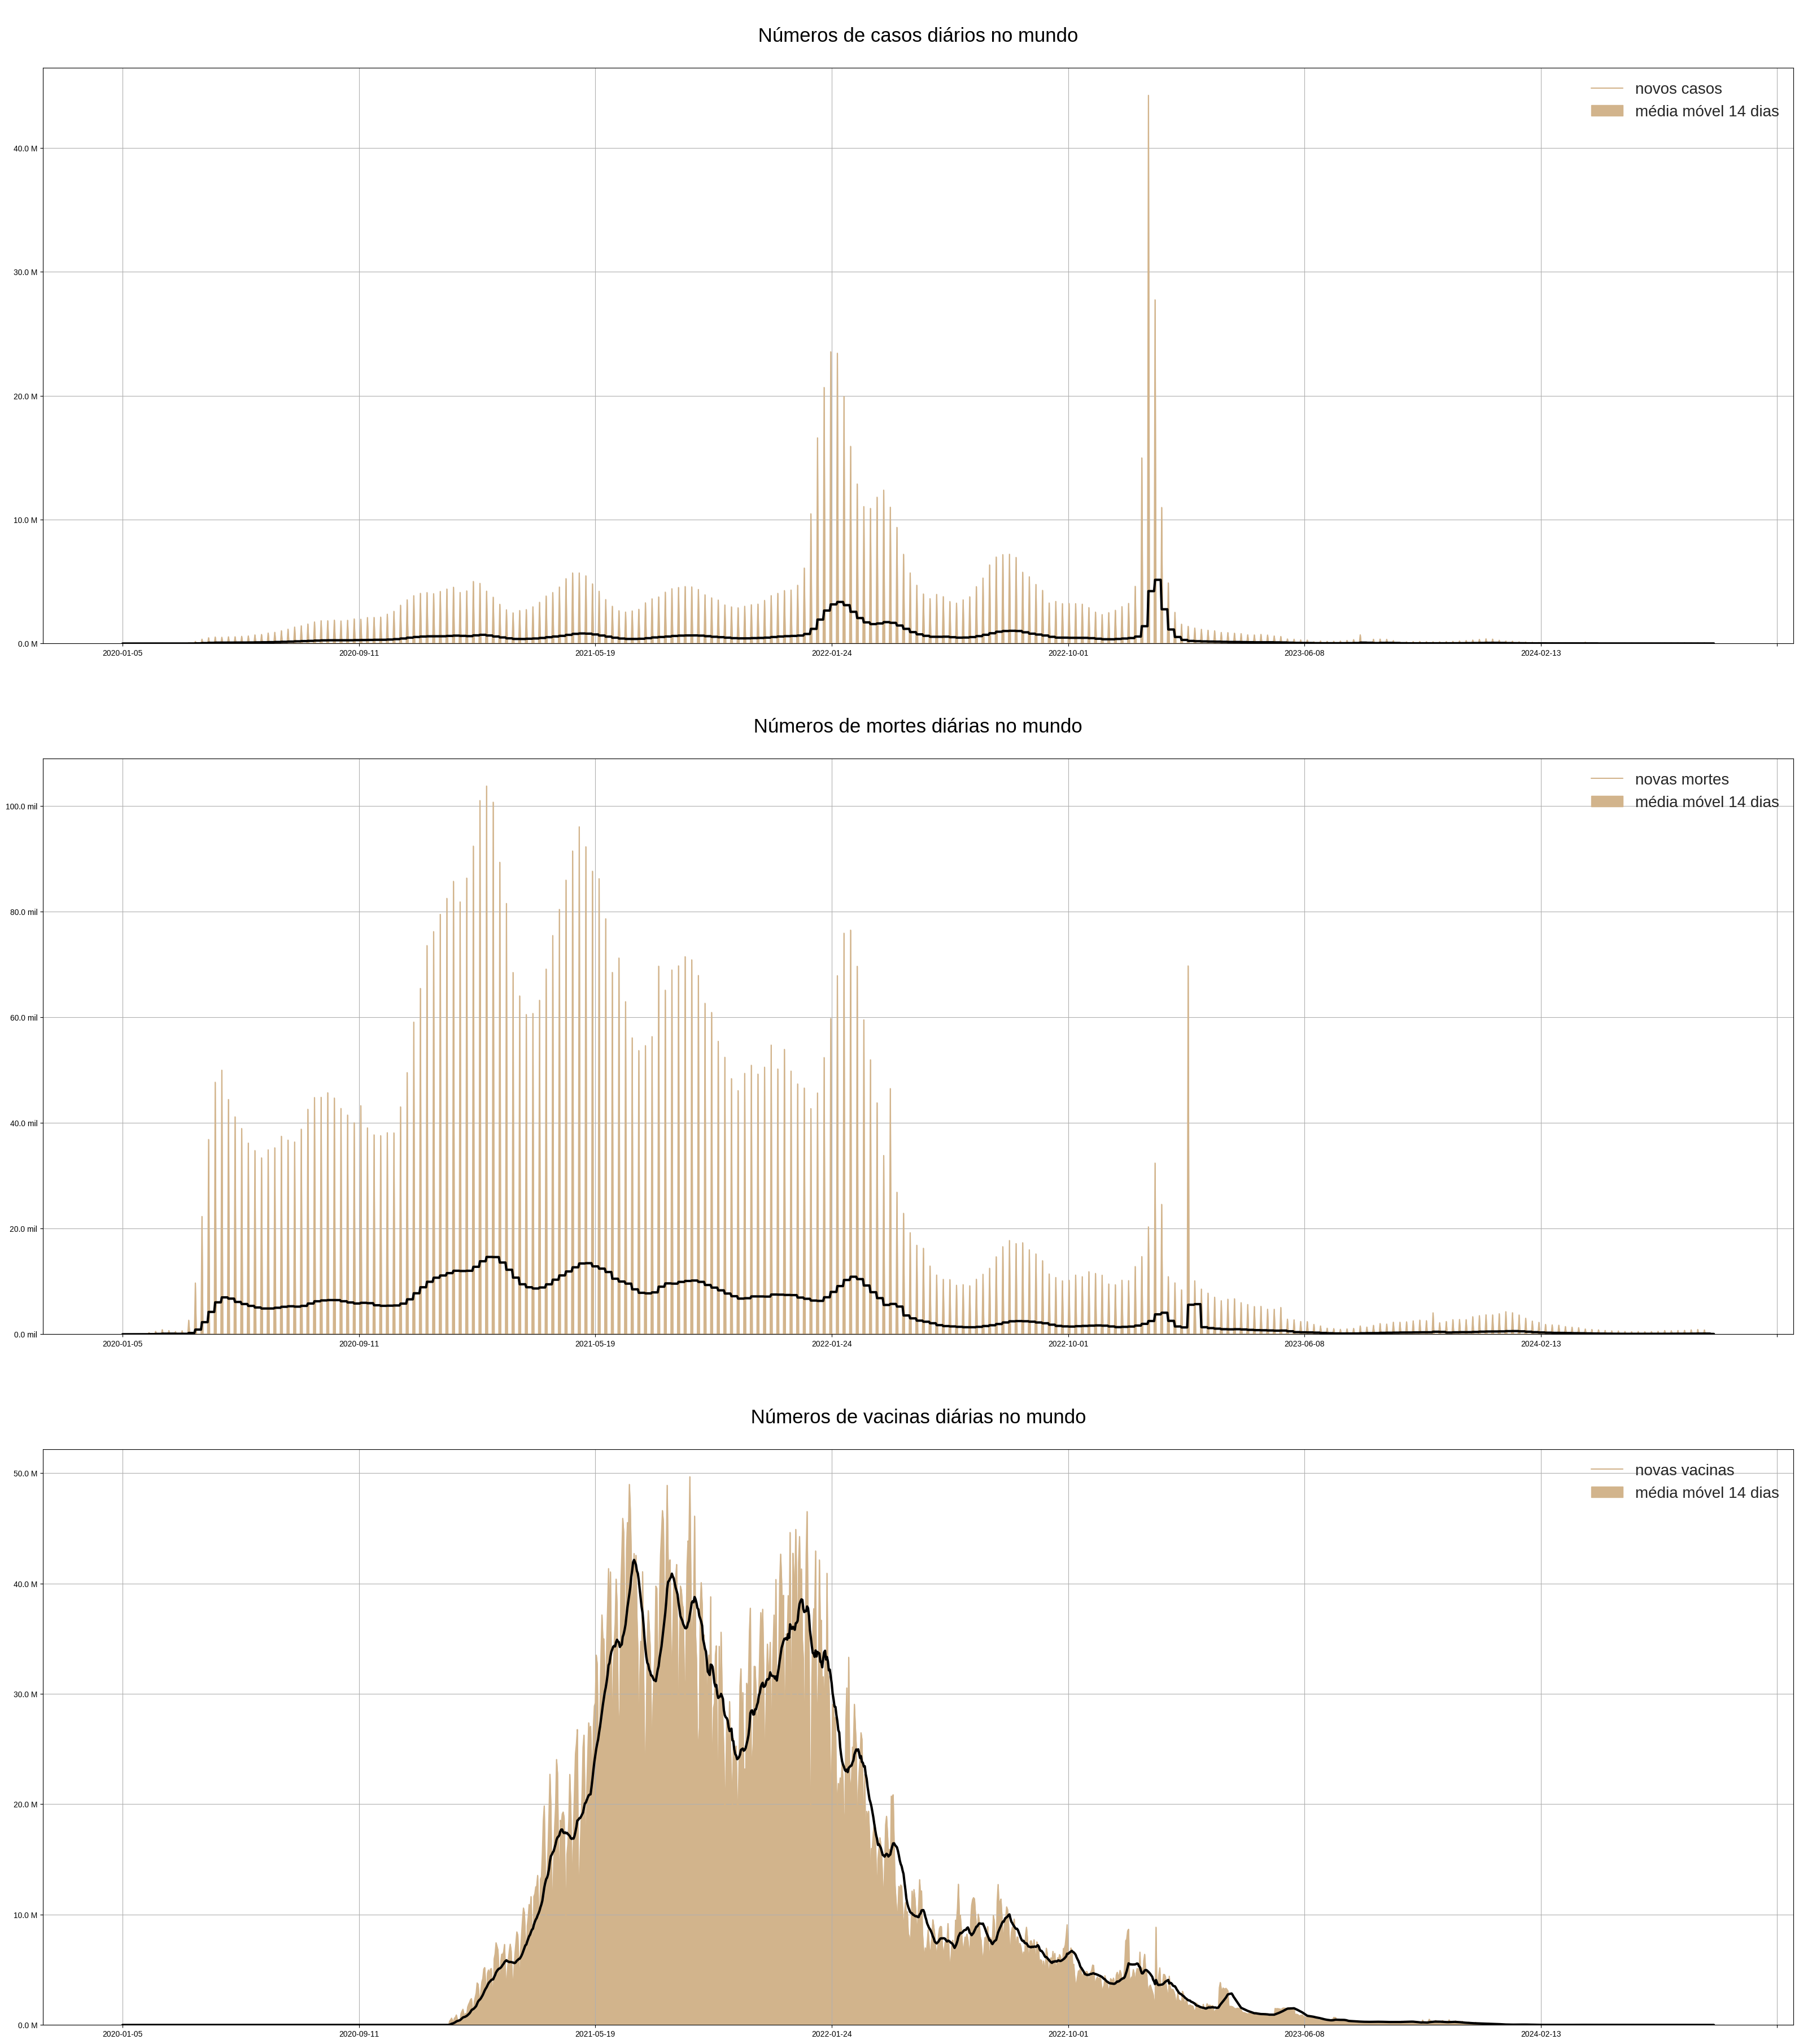

In [17]:
#Gráfico do número de casos, mortes e vacinas diários no mundo
fig, ax = plt.subplots(3, 1, figsize = (40, 45), dpi = 100)
plt.style.use(['seaborn-v0_8-darkgrid'])

world_plot.plot(kind = 'area', subplots = True, ax = [ax[0], ax[1], ax[2]], color = 'tan', legend = None)
world_plot_MM.plot(kind = 'line', subplots = True, ax = [ax[0], ax[1], ax[2]], linestyle = 'solid',  color = 'black', linewidth = 3)

ax[0].set_title('\n Números de casos diários no mundo \n', fontsize = 25)
ax[0].ticklabel_format(style = 'plain', axis = 'y')
ax[0].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '%1.1f' % (x*1e-6) + ' M'))
ax[0].set_xlabel(None)
ax[0].legend(('novos casos','média móvel 14 dias'), fontsize = 20)

ax[1].set_title('\n Números de mortes diárias no mundo \n', fontsize = 25)
ax[1].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '%1.1f' % (x / 1000) + ' mil'))
ax[1].set_xlabel(None)
ax[1].legend(('novas mortes','média móvel 14 dias'), fontsize = 20)

ax[2].set_title('\n Números de vacinas diárias no mundo \n', fontsize = 25)
ax[2].ticklabel_format(style = 'plain', axis = 'y')
ax[2].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '%1.1f' % (x*1e-6) + ' M'))
ax[2].set_xlabel(None)
ax[2].legend(('novas vacinas','média móvel 14 dias'), fontsize = 20)

plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 20)

fig.show()

# **Número de casos, mortes, vacinas e relação caso-fatalidade por continente**


In [18]:
#Selecionar os dados de interesse para analisar os números por continente
df_continents = df[['location','total_cases', 'total_deaths', 'total_vaccinations']].loc[df.location.isin(['Asia', 'Europe', 'Africa', 'North America', 'South America','Oceania'])]
df_continents = df_continents.groupby('location')[['total_cases', 'total_deaths', 'total_vaccinations']].max().sort_values(by = 'location')

In [19]:
#Calcular a relação caso-fatalidade
df_continents['case_fatality_ratio'] = ((df_continents['total_deaths']/df_continents['total_cases']) * 100).round(2)

In [20]:
#Converter o índice 'location' em coluna, resetar e dropar o índice anterior e depois reordenar as colunas
df_continents['continent'] = df_continents.index
df_continents.reset_index(drop = True, inplace = True)
df_continents = df_continents[['continent', 'total_cases', 'total_deaths', 'total_vaccinations', 'case_fatality_ratio']]

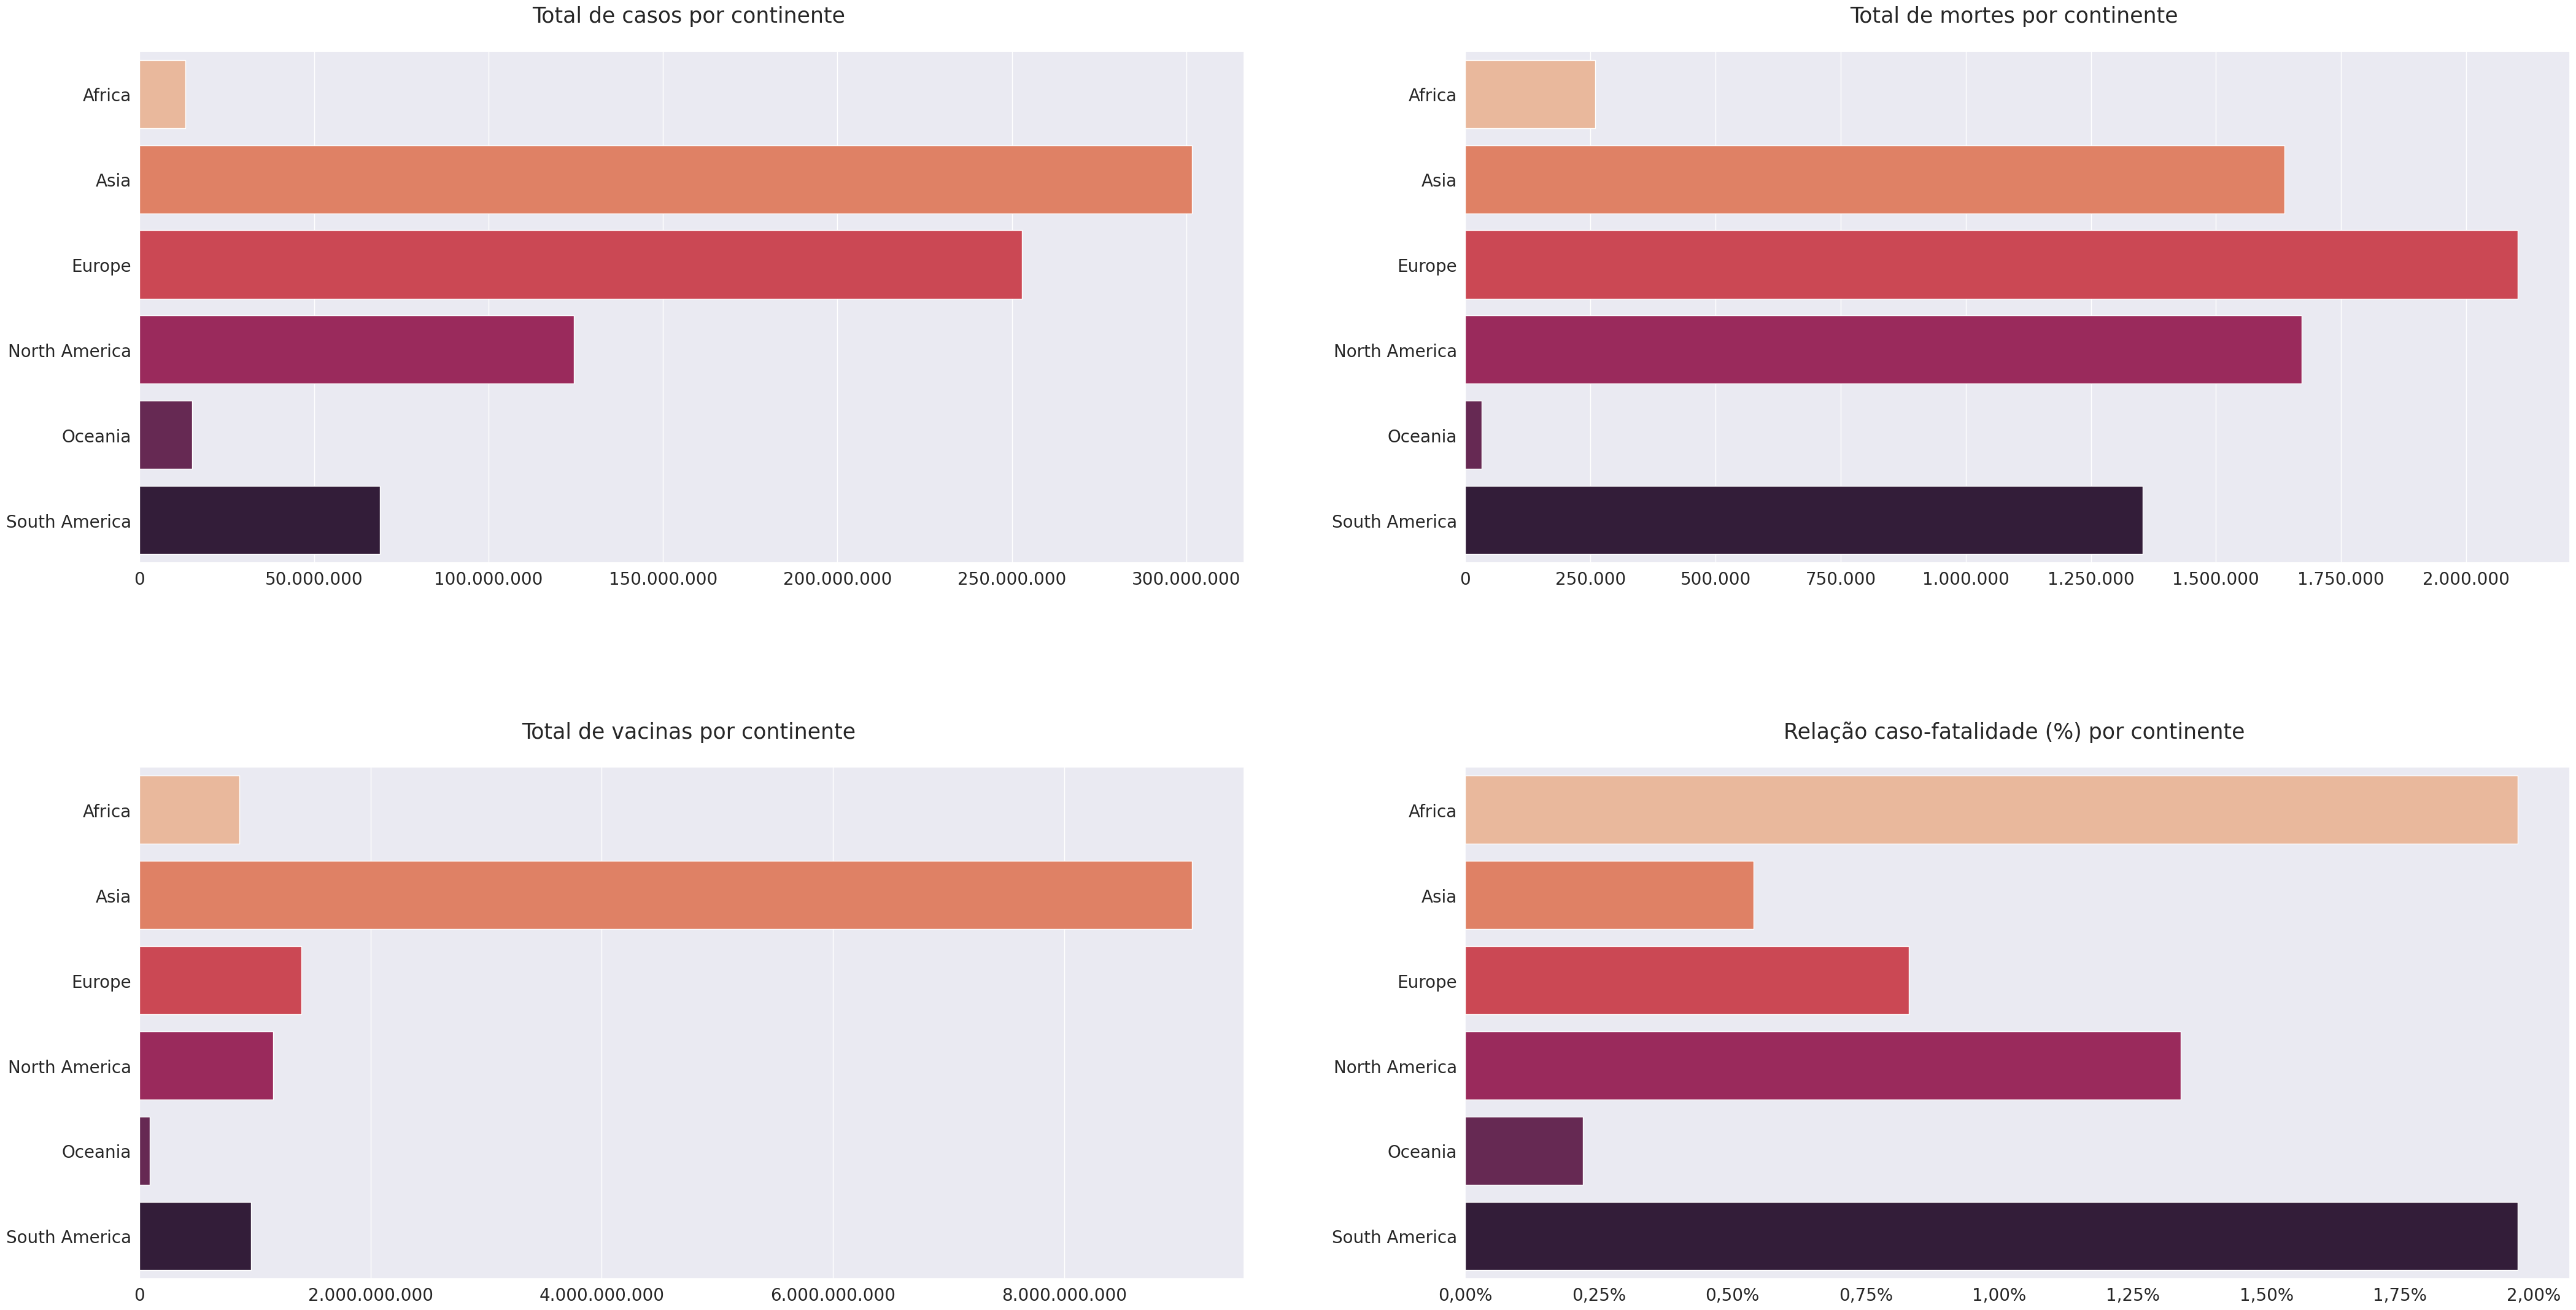

In [21]:
#Gráficos
sns.set_theme(style = "dark")
fig, ax = plt.subplots(2, 2, figsize = (36,25), dpi = 100)
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 1.2, top = 0.9, wspace = 0.2, hspace = 0.4)

ax[0, 0].ticklabel_format(style='plain') #remover notação científica
ax[0, 1].ticklabel_format(style='plain') #remover notação científica
ax[1, 0].ticklabel_format(style='plain') #remover notação científica

ax[0, 0].set_title('Total de casos por continente \n', fontsize = 25)
ax[0, 0] = sns.barplot(data = df_continents, x = df_continents['total_cases'], y = df_continents['continent'], hue = df_continents['continent'], palette = 'rocket_r', errorbar = None,
                       order = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'], ax = ax[0, 0], legend=False)
ax[0, 0].set_xlabel(None)
ax[0, 0].set_ylabel(None)
ax[0, 0].tick_params(axis ='x', labelsize= 20)
ax[0, 0].tick_params(axis ='y', labelsize= 20)
ax[0, 0].xaxis.grid()
ax[0, 0].get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.')))

ax[0, 1].set_title('Total de mortes por continente \n', fontsize = 25)
ax[0, 1] = sns.barplot(data = df_continents, x = df_continents['total_deaths'], y = df_continents['continent'], hue = df_continents['continent'], palette = 'rocket_r', errorbar = None,
                       order = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'], ax = ax[0, 1], legend=False)
ax[0, 1].set_xlabel(None)
ax[0, 1].set_ylabel(None)
ax[0, 1].tick_params(axis ='x', labelsize= 20)
ax[0, 1].tick_params(axis ='y', labelsize= 20)
ax[0, 1].xaxis.grid()
ax[0, 1].get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.')))

ax[1, 0].set_title('Total de vacinas por continente \n', fontsize = 25)
ax[1, 0] = sns.barplot(data = df_continents, x = df_continents['total_vaccinations'], y = df_continents['continent'], hue = df_continents['continent'], palette = 'rocket_r', errorbar = None,
                       order = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'], ax = ax[1, 0], legend=False)
ax[1, 0].set_xlabel(None)
ax[1, 0].set_ylabel(None)
ax[1, 0].tick_params(axis ='x', labelsize= 20)
ax[1, 0].tick_params(axis ='y', labelsize= 20)
ax[1, 0].xaxis.grid()
ax[1, 0].get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.')))

ax[1, 1].set_title('Relação caso-fatalidade (%) por continente \n', fontsize = 25)
ax[1, 1] = sns.barplot(data = df_continents, x = df_continents['case_fatality_ratio'], y = df_continents['continent'], hue = df_continents['continent'], palette = 'rocket_r', errorbar = None,
                    order = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'], ax = ax[1, 1], legend=False)
ax[1, 1].set_xlabel(None)
ax[1, 1].set_ylabel(None)
ax[1, 1].tick_params(axis ='x', labelsize= 20)
ax[1, 1].tick_params(axis ='y', labelsize= 20)
ax[1, 1].get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(float(x)/100, ',.2%').replace('.', ',')))

plt.show()

# **Ranking com os 10 países que apresentaram mais mortes por covid-19, em termos absolutos e relativos**

<h3>Encontrar o número de mortes por país, em termos absolutos</h3>

In [22]:
df.groupby('location')['total_deaths'].max().sort_values(ascending = False).head(10)

,total_deaths
location,
World,7057132
High-income countries,2997359
Upper-middle-income countries,2824452
Europe,2102483
North America,1671178
Asia,1637249
South America,1354187
European Union (27),1262988
United States,1193165


<h3>É necessário remover valores que não pertencem a um único país</h3>

In [23]:
#Remover valores que não pertencem a um único país e visualizar o ranking
df_ranking = df.loc[df.location.isin(['High-income countries', 'Asia', 'Upper-middle-income countries',
                                      'Europe', 'Africa', 'North America', 'Lower-middle-income countries', 'South America',
                                      'European Union (27)','Oceania', 'Low-income countries', 'International', 'Micronesia (country)']) == False]

vAbsolute_deaths = df_ranking.loc[df_ranking.location != 'World'].groupby('location')['total_deaths'].max().sort_values(ascending = False).map('{:0,.0f}'.format).head(10)
vAbsolute_deaths = pd.DataFrame(vAbsolute_deaths)
#vAbsolute_deaths

<h3>Encontrar os 10 países que tiveram os maiores percentuais de mortes por covid-19 no mundo</h3>


In [24]:
#Selecionar valores para realizar o cálculo do valor percentual do total de mortes
world = df_ranking[['location', 'total_deaths']].loc[df_ranking.location == 'World'].max()

countries = df_ranking[['location', 'total_deaths']].loc[df_ranking.location != 'World'].groupby('location').max()

In [25]:
#Visualizar o ranking
percent_deaths = (countries.total_deaths/world.total_deaths).sort_values(ascending = False).head(10)
percent_deaths = pd.DataFrame(percent_deaths).rename(columns = {'total_deaths': '%total_deaths'})
percent_deaths["rank_total_deaths"] = percent_deaths['%total_deaths'].rank(ascending = False).map('{:0,.0f}'.format)
percent_deaths["%total_deaths"] = percent_deaths['%total_deaths'].map('{:0,.2%}'.format)
#percent_deaths

<h3>Ranquear os países mais populosos do mundo</h3>


In [26]:
rank_population = df_ranking.loc[df_ranking.location != 'World'].groupby('location')['population'].max().sort_values(ascending = False)
rank_population = pd.DataFrame(rank_population)
rank_population["population_rank"] = rank_population['population'].rank(ascending = False).map('{:0,.0f}'.format)
rank_population['population'] = rank_population['population'].map('{:0,.0f}'.format)
#rank_population.head(10)

<h2>Tabela final</h2>

In [27]:
tb_final = vAbsolute_deaths.merge(percent_deaths, on = 'location').merge(rank_population['population_rank'], on = 'location')
tb_final

,total_deaths,%total_deaths,rank_total_deaths,population_rank
location,,,,
United States,"1,193,165",16.91%,1,3
Brazil,"702,116",9.95%,2,7
India,"533,623",7.56%,3,2
Russia,"403,188",5.71%,4,9
Mexico,"334,551",4.74%,5,10
United Kingdom,"232,112",3.29%,6,22
Peru,"220,975",3.13%,7,44
Italy,"197,307",2.80%,8,25
Germany,"174,979",2.48%,9,19


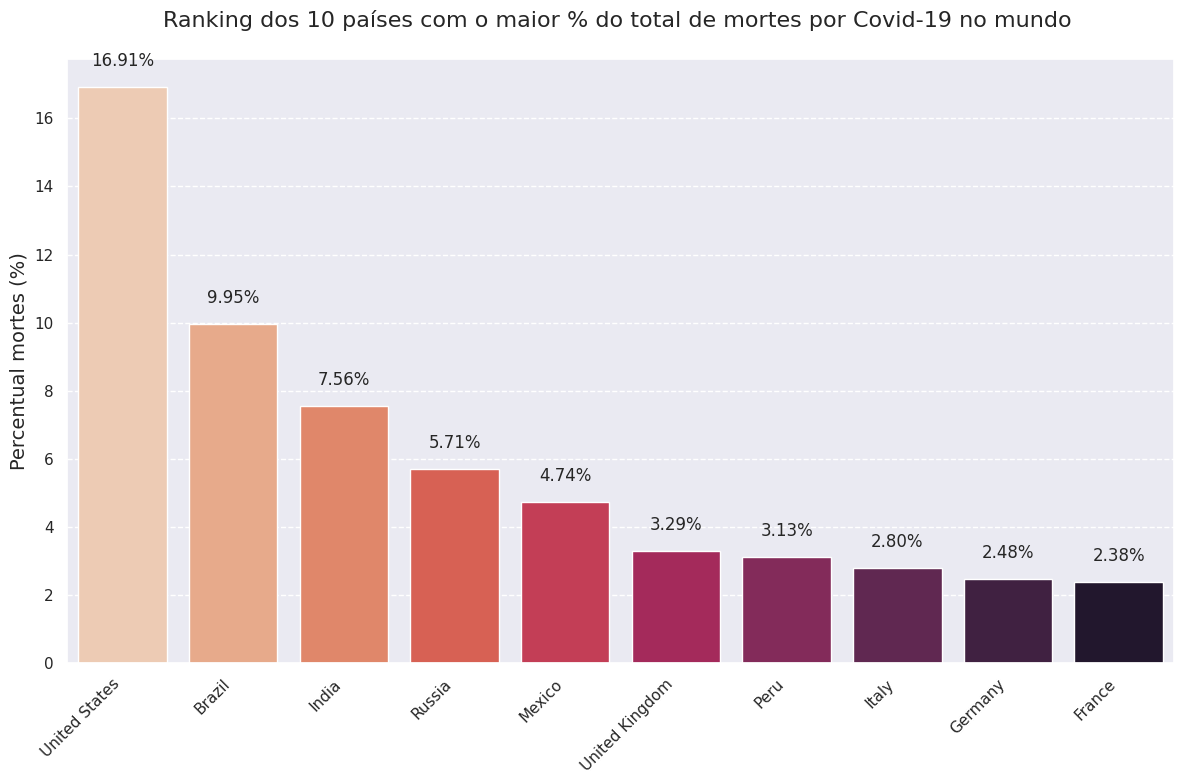

In [28]:
# Select the data for the percentage of total deaths
dados_barplot = ((countries.total_deaths/world.total_deaths)* 100).sort_values(ascending = False).round(2).head(10)

# Create a Matplotlib bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=dados_barplot.index, y=dados_barplot.values, hue=dados_barplot.index, palette='rocket_r', legend=False)

# Add labels and title
plt.xlabel(None)
plt.ylabel("Percentual mortes (%)", fontsize=14)
plt.title("Ranking dos 10 países com o maior % do total de mortes por Covid-19 no mundo \n", fontsize=16)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

# Add percentage labels on top of the bars
for i, value in enumerate(dados_barplot.values):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.grid(axis='y', linestyle='--') # Add a horizontal grid

# Save the plot as a PNG image
plt.savefig('percent_deaths_ranking_matplotlib.png')

# Display the plot
plt.show()

## Ranking com os 10 países que apresentaram mais mortes por covid-19 a cada  milhão de habitantes

Obs: sistema de separação de milhar em inglês

In [29]:
deaths_per_million = df_ranking.groupby('location')['total_deaths_per_million'].max().sort_values(ascending = False).head(10).map('{:0,.0f}'.format)
deaths_per_million = pd.DataFrame(deaths_per_million)
deaths_per_million

,total_deaths_per_million
location,
Peru,"6,601"
Bulgaria,"5,670"
North Macedonia,"5,422"
Bosnia and Herzegovina,"5,115"
Hungary,"5,065"
Croatia,"4,800"
Slovenia,"4,767"
Georgia,"4,519"
Montenegro,"4,318"


# **Ranking com os 10 países que apresentaram maior relação caso-fatalidade**

In [30]:
#Selecionar o último valor informado por cada país
case_fatality_ratio = df_ranking.groupby('location')[['total_cases', 'total_deaths']].max()
case_fatality_ratio = case_fatality_ratio.loc[(case_fatality_ratio['total_cases'] != 0) & (case_fatality_ratio['total_deaths'] != 0)] #Mantém apenas os países que possuem registos para número de casos ou de mortes

In [31]:
case_fatality_ratio = df_ranking.groupby('location')[['total_cases', 'total_deaths']].max()
case_fatality_ratio['case_fatality_ratio'] = round((case_fatality_ratio['total_deaths']/case_fatality_ratio['total_cases']) * 100, 2)
case_fatality_ratio['case_fatality_ratio'].sort_values(ascending = False).head(10)

,case_fatality_ratio
location,
Yemen,18.07
Sudan,7.89
Syria,5.51
Somalia,4.98
Peru,4.88
Egypt,4.81
Mexico,4.39
Bosnia and Herzegovina,4.06
Liberia,3.63


## **Números da vacinação**

<h3>Números da vacinação por continente</h3>

In [32]:
data_vaccination = df[['location','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
                       'people_fully_vaccinated_per_hundred']].loc[df.location.isin(['Asia', 'Europe', 'Africa', 'North America', 'South America','Oceania'])]

df_vaccination = data_vaccination.groupby('location')[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
                                                       'people_fully_vaccinated_per_hundred']].max().sort_values(by = 'location')

# Apply formatting using vectorized string operations
for col in ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']:
    df_vaccination[col] = df_vaccination[col].apply(lambda x: "{:,}".format(x)).str.replace(',', '.', regex=False)

df_vaccination

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
location,,,,,,
Africa,863.237.900,555.027.330,462.411.423,60.50,38.90,32.41
Asia,9.104.304.615,3.689.438.947,3.462.095.463,192.83,78.14,73.33
Europe,1.399.334.208,523.814.328,493.751.304,187.88,70.33,66.29
North America,1.158.547.416,458.563.506,394.493.922,192.99,76.39,65.71
Oceania,88.358.812,28.960.501,28.072.902,196.18,64.30,62.33
South America,964.991.405,375.459.127,337.117.943,220.91,85.95,77.18


<h3>Ranking com os 10 países que tiveram o maior número de pessoas totalmente vacinadas a cada 100 habitantes</h3>

In [33]:
df_ranking.groupby('location')['people_fully_vaccinated_per_hundred'].max().sort_values(ascending = False).head(10)

,people_fully_vaccinated_per_hundred
location,
Gibraltar,126.89
Tokelau,116.38
Qatar,105.83
United Arab Emirates,103.72
Pitcairn,100.00
Brunei,99.49
Singapore,90.85
Chile,90.29
Cuba,89.67


<h3>Ranking com os 10 países que tiveram o menor número de pessoas totalmente vacinadas a cada 100 habitantes</h3>

In [34]:
df_ranking.groupby('location')['people_fully_vaccinated_per_hundred'].max().sort_values(ascending = True).head(10)

,people_fully_vaccinated_per_hundred
location,
Liechtenstein,0.00
Switzerland,0.00
Burundi,0.28
Yemen,2.40
Haiti,3.16
Papua New Guinea,3.17
Madagascar,8.88
Senegal,8.93
Syria,10.66
